In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Libraries 
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Fetch dataset 
census_income_kdd = fetch_ucirepo(id=117) 

In [4]:
# Access features (X) and target (y)
X = census_income_kdd.data.features
y = census_income_kdd.data.targets

# Combine into one DataFrame for easier processing
df = pd.concat([X, y], axis=1)

print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial shape: (199523, 42)
Columns: ['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'AHRSPAY', 'year', 'income']


In [5]:
#Inspect data types and missing values
print("\nData info:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AAGE       199523 non-null  int64  
 1   ACLSWKR    199523 non-null  object 
 2   ADTINK     199523 non-null  int64  
 3   ADTOCC     199523 non-null  int64  
 4   AHGA       199523 non-null  object 
 5   AHSCOL     199523 non-null  object 
 6   AMARITL    199523 non-null  object 
 7   AMJIND     199523 non-null  object 
 8   AMJOCC     199523 non-null  object 
 9   ARACE      199523 non-null  object 
 10  AREORGN    199523 non-null  object 
 11  ASEX       199523 non-null  object 
 12  AUNMEM     199523 non-null  object 
 13  AUNTYPE    199523 non-null  object 
 14  AWKSTAT    199523 non-null  object 
 15  CAPGAIN    199523 non-null  int64  
 16  GAPLOSS    199523 non-null  int64  
 17  DIVVAL     199523 non-null  int64  
 18  FILESTAT   199523 non-null  object 
 19  GRINREG    

In [6]:
df.replace(['?', ' ?', 'Unknown', ' unknown'], np.nan, inplace=True)

In [7]:
# Fill categorical missing with mode, numeric missing with median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [8]:
if 'MARSUPWT' in df.columns:
    df.drop(columns=['MARSUPWT'], inplace=True)

print("\nShape after cleaning:", df.shape)


Shape after cleaning: (199523, 42)


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# For analysis, keep a clean copy before encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)

Shape after encoding: (199523, 374)


In [10]:
print("\nDescriptive statistics:")
print(df.describe(include='all').transpose())


Descriptive statistics:
              count unique                                 top    freq  \
AAGE       199523.0    NaN                                 NaN     NaN   
ACLSWKR      199523      9                     Not in universe  100245   
ADTINK     199523.0    NaN                                 NaN     NaN   
ADTOCC     199523.0    NaN                                 NaN     NaN   
AHGA         199523     17                High school graduate   48407   
AHSCOL       199523      3                     Not in universe  186943   
AMARITL      199523      7                       Never married   86485   
AMJIND       199523     24         Not in universe or children  100684   
AMJOCC       199523     15                     Not in universe  100684   
ARACE        199523      5                               White  167365   
AREORGN      199523     10                           All other  171907   
ASEX         199523      2                              Female  103984   
AUNMEM       

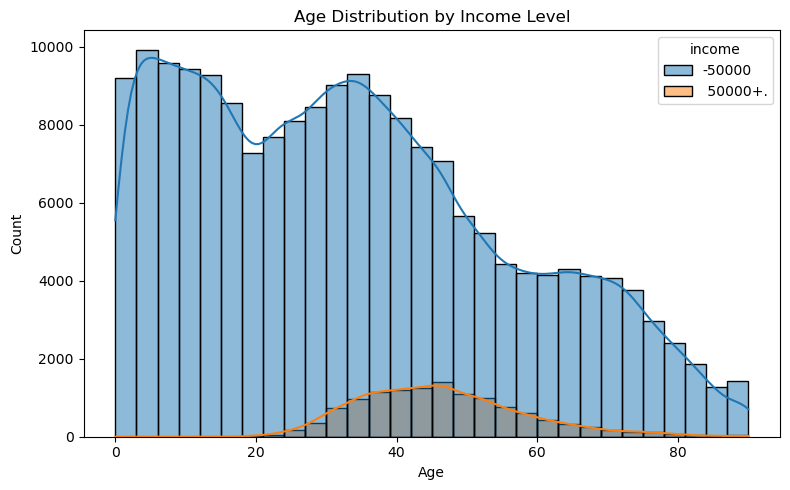

In [11]:
# (a) Age distribution by income
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='AAGE', hue='income', bins=30, kde=True)
plt.title('Age Distribution by Income Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

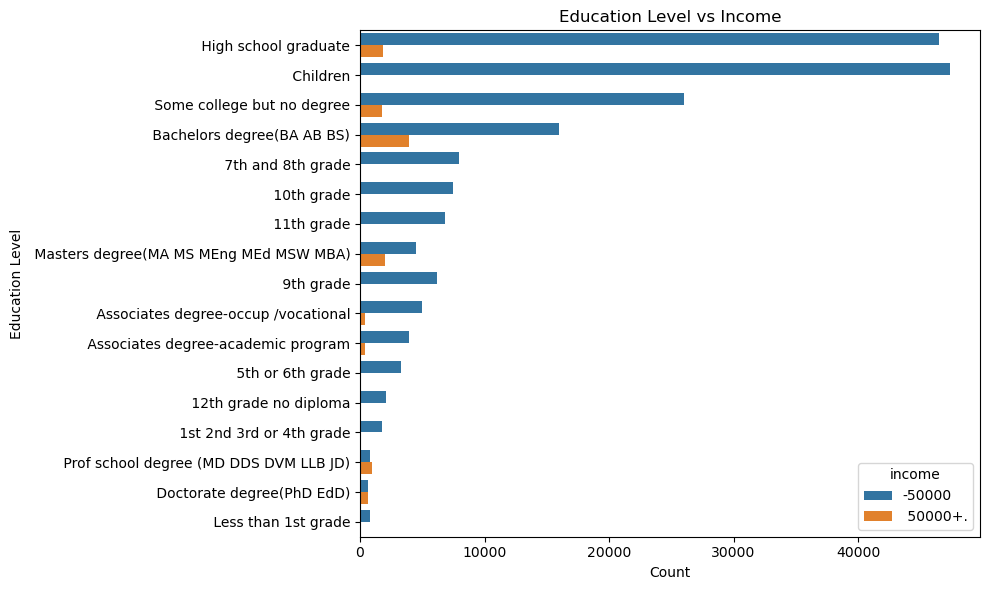

In [12]:
# (b) Education Level vs Income
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='AHGA', hue='income',
              order=df['AHGA'].value_counts().index)
plt.title('Education Level vs Income')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.savefig('education_vs_income.png')
plt.show()

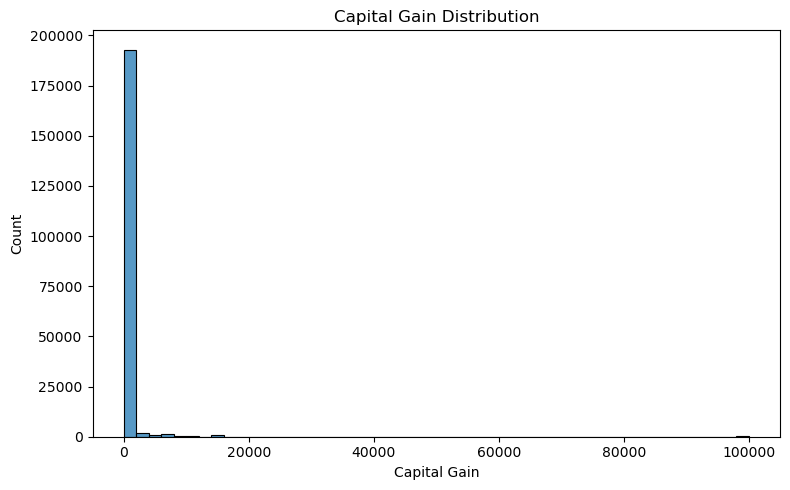

In [13]:
# (c) Capital Gain Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['CAPGAIN'], bins=50)
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.tight_layout()
plt.savefig('capital_gain_distribution.png')
plt.show()

In [14]:
df.to_csv("census_income_kdd_clean.csv", index=False)
print("Cleaned dataset saved as census_income_kdd_clean.csv")

Cleaned dataset saved as census_income_kdd_clean.csv


In [15]:
# Cell purpose: import libraries
import pandas as pd
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [16]:
# Cell purpose: load the cleaned dataset you saved earlier
df = pd.read_csv("census_income_kdd_clean.csv")
print("Shape:", df.shape)
print(df.columns.tolist()[:30])


Shape: (199523, 42)
['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP']


In [17]:
# Cell purpose: quick dtype and missing check
print(df.dtypes.value_counts())
print("\nAny missing values?:")
print(df.isna().sum().sum())



object     29
int64      12
float64     1
dtype: int64

Any missing values?:
0


In [18]:
# Cell purpose: find and inspect target column values
target_col = [c for c in df.columns if "income" in c.lower()][0]
print("Target column:", target_col)
print("Unique values:", df[target_col].unique())


Target column: income
Unique values: ['-50000' ' 50000+.']


In [19]:
# Cell purpose: clean target strings and map to numeric 0/1
y = df[target_col].astype(str).str.strip().str.replace('.', '', regex=False)
y = y.map({'-50000': 0, '50000+': 1}).astype(int)
print("Target distribution:\n", y.value_counts())

# Keep features separate
X = df.drop(columns=[target_col])


Target distribution:
 0    187141
1     12382
Name: income, dtype: int64


In [20]:
# Cell purpose: create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (149642, 41) Test: (49881, 41)


In [21]:
# Cell purpose: detect categorical and numeric columns dynamically
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
print(f"Categorical columns: {len(cat_cols)} | Numerical columns: {len(num_cols)}")
# Optionally list a few
print("Example cat cols:", cat_cols[:10])
print("Example num cols:", num_cols[:10])


Categorical columns: 28 | Numerical columns: 13
Example cat cols: ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM']
Example num cols: ['AAGE', 'ADTINK', 'ADTOCC', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'MARSUPWRT', 'NOEMP', 'SEOTR', 'VETYN']


In [22]:
# Cell purpose: define ColumnTransformers used in pipelines
# Updated to use sparse_output=False instead of sparse=False
preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)


print("Preprocessors ready.")


Preprocessors ready.


In [23]:
# Cell purpose: define pipelines for 3 different paradigms
models = {
    "Logistic Regression": Pipeline([
        ('pre', preprocessor_lr),
        ('clf', LogisticRegression(solver='saga', max_iter=3000,
                                   class_weight='balanced', n_jobs=-1, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('pre', preprocessor_tree),
        ('clf', RandomForestClassifier(n_estimators=200, class_weight='balanced',
                                       n_jobs=-1, random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('pre', preprocessor_tree),
        ('clf', GradientBoostingClassifier(n_estimators=200, random_state=42))
    ])
}
print("Models defined:", list(models.keys()))


Models defined: ['Logistic Regression', 'Random Forest', 'Gradient Boosting']


In [24]:
# Cell purpose: define a reusable evaluation function
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    t0 = time.time()
    model.fit(X_tr, y_tr)
    fit_time = time.time() - t0
    preds = model.predict(X_te)
    probas = model.predict_proba(X_te)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_te, preds),
        "F1": f1_score(y_te, preds),
        "ROC_AUC": roc_auc_score(y_te, probas) if probas is not None else np.nan,
        "Train_Time_s": fit_time
    }
    print(f"\n=== {name} ===")
    print("Accuracy:", metrics["Accuracy"])
    print("F1:", metrics["F1"])
    if not np.isnan(metrics["ROC_AUC"]):
        print("ROC AUC:", metrics["ROC_AUC"])
    print(f"Training time: {fit_time:.2f}s")
    print(classification_report(y_te, preds))
    return metrics


In [25]:
# Cell purpose: train & evaluate each model on holdout (test set)
results = []
for name, model in models.items():
    res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(res)

results_df = pd.DataFrame(results)
results_df



=== Logistic Regression ===
Accuracy: 0.8531104027585654
F1: 0.4299385357504085
ROC AUC: 0.9443867695398076
Training time: 634.05s
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     46785
           1       0.28      0.89      0.43      3096

    accuracy                           0.85     49881
   macro avg       0.64      0.87      0.67     49881
weighted avg       0.95      0.85      0.89     49881


=== Random Forest ===
Accuracy: 0.9537098293939577
F1: 0.49989170457006715
ROC AUC: 0.9437949562557182
Training time: 14.90s
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     46785
           1       0.76      0.37      0.50      3096

    accuracy                           0.95     49881
   macro avg       0.86      0.68      0.74     49881
weighted avg       0.95      0.95      0.95     49881


=== Gradient Boosting ===
Accuracy: 0.9564563661514405
F1: 0.5612121212121213
ROC AUC: 

,Model,Accuracy,F1,ROC_AUC,Train_Time_s
0,Logistic Regression,0.853110,0.429939,0.944387,634.048550
1,Random Forest,0.953710,0.499892,0.943795,14.900981
2,Gradient Boosting,0.956456,0.561212,0.950177,252.126175


In [26]:
# ================================================================
# ⚡ Optimized Cross-Validation (3-fold, 30% data sample)
# ================================================================

from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import pandas as pd
import time

# Take a 30% stratified sample of the dataset for faster CV
X_cv = X.sample(frac=0.3, random_state=42)
y_cv = y.loc[X_cv.index]

print(f"Running CV on subset: {X_cv.shape[0]} samples ({100*0.3:.0f}% of full data)")

# Define 3-fold CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    print(f"\nRunning 3-fold CV for {name} ...")
    start_time = time.time()
    
    # Cross-validate
    scores = cross_validate(
        model,
        X_cv,
        y_cv,
        cv=cv,
        scoring=['accuracy', 'f1', 'roc_auc'],
        n_jobs=-1,
        return_train_score=False
    )
    
    duration = time.time() - start_time
    cv_results.append({
        "Model": name,
        "CV_Accuracy": np.mean(scores['test_accuracy']),
        "CV_F1": np.mean(scores['test_f1']),
        "CV_ROC_AUC": np.mean(scores['test_roc_auc']),
        "CV_Runtime_s": duration
    })
    print(f"Finished {name} in {duration/60:.1f} minutes.")

# Summarize CV results
cv_df = pd.DataFrame(cv_results)
print("\n=== Cross-Validation Summary (3-fold, 30% data) ===")
print(cv_df)


Running CV on subset: 59857 samples (30% of full data)

Running 3-fold CV for Logistic Regression ...
Finished Logistic Regression in 3.1 minutes.

Running 3-fold CV for Random Forest ...
Finished Random Forest in 0.2 minutes.

Running 3-fold CV for Gradient Boosting ...
Finished Gradient Boosting in 1.8 minutes.

=== Cross-Validation Summary (3-fold, 30% data) ===
                 Model  CV_Accuracy     CV_F1  CV_ROC_AUC  CV_Runtime_s
0  Logistic Regression     0.855489  0.421568    0.940732    187.617658
1        Random Forest     0.952052  0.429590    0.939180     11.056980
2    Gradient Boosting     0.956045  0.539958    0.947262    105.813611


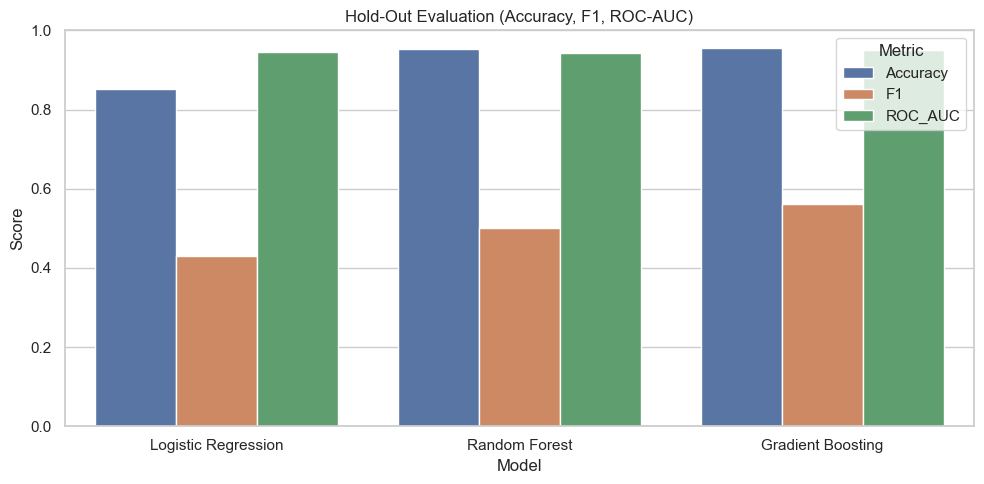

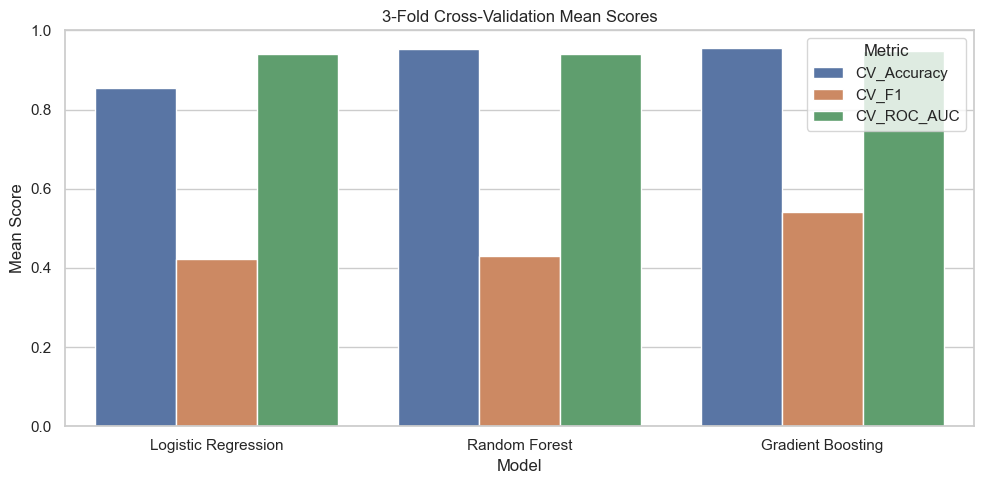

In [27]:
# Merge holdout and CV results
merged = results_df.merge(cv_df, on="Model")

# Plot holdout metrics
plt.figure(figsize=(10,5))
sns.barplot(data=merged.melt(id_vars='Model',
                             value_vars=['Accuracy','F1','ROC_AUC']),
            x='Model', y='value', hue='variable')
plt.title("Hold-Out Evaluation (Accuracy, F1, ROC-AUC)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

# Plot cross-validation mean metrics
plt.figure(figsize=(10,5))
sns.barplot(data=merged.melt(id_vars='Model',
                             value_vars=['CV_Accuracy','CV_F1','CV_ROC_AUC']),
            x='Model', y='value', hue='variable')
plt.title("3-Fold Cross-Validation Mean Scores")
plt.ylabel("Mean Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


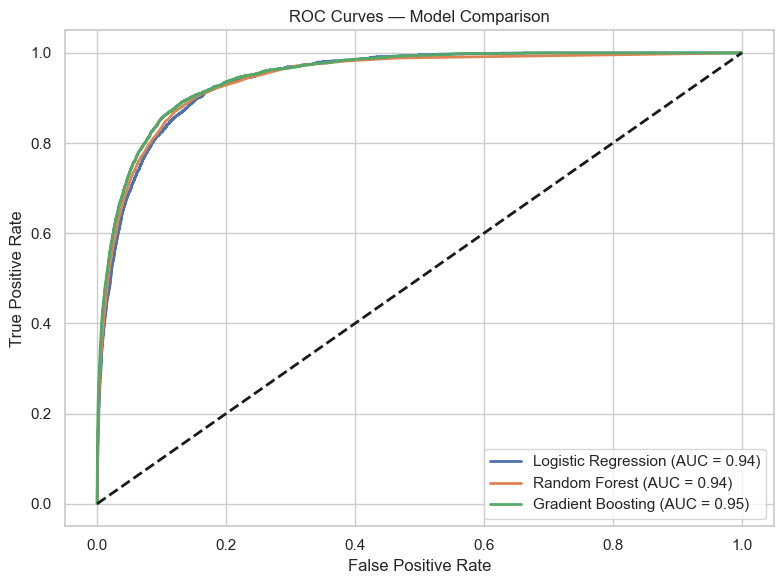

In [29]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Model Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


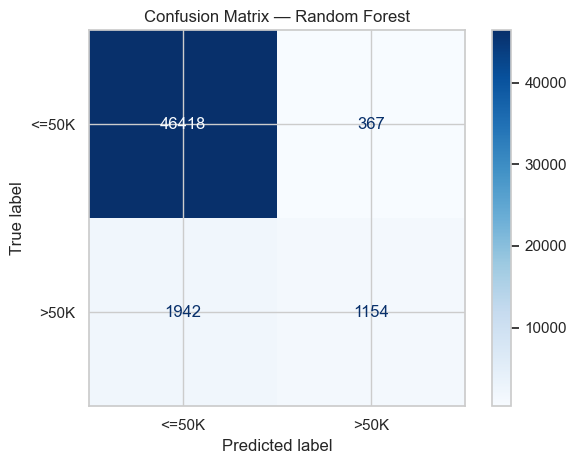

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

best_model = models["Random Forest"]  # or whichever you choose
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.show()


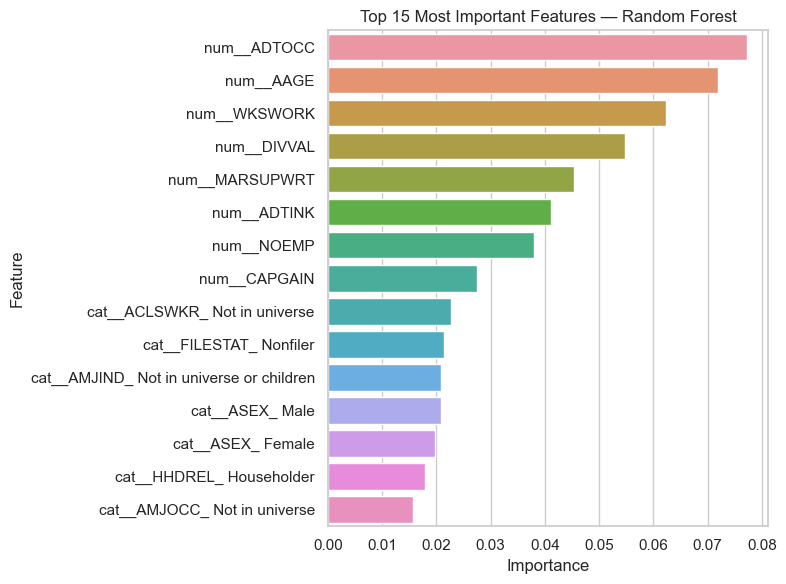

In [31]:
# Random Forest feature importance
rf_model = best_model.named_steps['clf']
feature_names = best_model.named_steps['pre'].get_feature_names_out()

importances = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_feats = feat_imp.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=top_feats, x='Importance', y='Feature')
plt.title("Top 15 Most Important Features — Random Forest")
plt.tight_layout()
plt.show()
